# Field Relationships and Correlations

## Lesson Goals
In this lesson we will learn to find relationships between columns in our Pandas DataFrame.

## Introduction
In the pre-work module we learned about **correlation** , particularly linear correlation. <br>
Pandas allows us to compute the correlation between two columns as well as a correlation matrix. <br>
We can also explore other types of relationships between columns in addition to linear correlation.

## Correlation Between Two Columns
In order to compute the **linear correlation between two columns**, we use the **corr function**.<br>
We apply it to one column and pass the other column as an argument to the function.

Recall our vehicles dataset. <br>
We would like to compute the correlation between **city MPG** and **highway MPG**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vehicles= pd.read_csv('./data/vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [3]:
vehicles['City MPG'].corr(vehicles['Highway MPG'])

0.9238555885288395

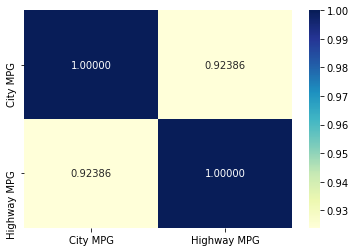

In [4]:
sns.heatmap(vehicles[['City MPG', 'Highway MPG']].corr(), cmap="YlGnBu", annot=True, fmt='.5f')

Recall that a correlation closer to 1 means a strong positive linear relationship between the two variables.<br>
Here the correlation is over 92%.<br>
This indicates a strong linear relationship between city and highway MPG.

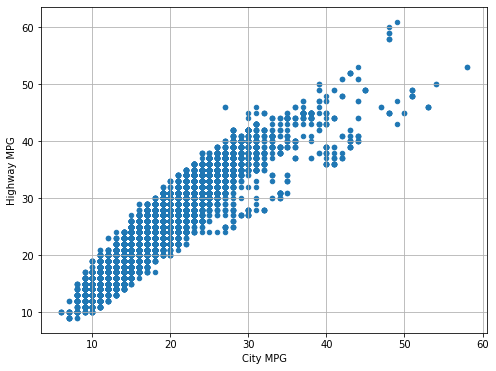

In [5]:
# Plot data and a linear regression model fit

vehicles.plot(kind='scatter', x='City MPG', y='Highway MPG', figsize=(8,6), grid=True);

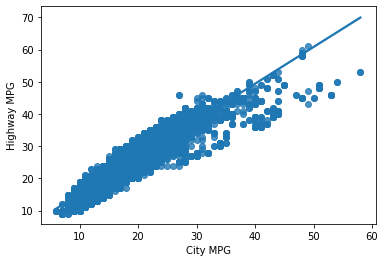

In [6]:
sns.regplot(x='City MPG', y='Highway MPG', data=vehicles);

## Correlation Matrix

Instead of computing the correlation for each pairs of columns, we can compute all correlations at once. <br>
Note that in our case **not all correlations will be meaningful**. For example, the year column might contain a numeric value but it is ordinal. <br>
Therefore, correlating **year** with values like **MPG or fuel cost per year has no real meaning**.

In [7]:
vehicles.corr()

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


### sns.heatmap()

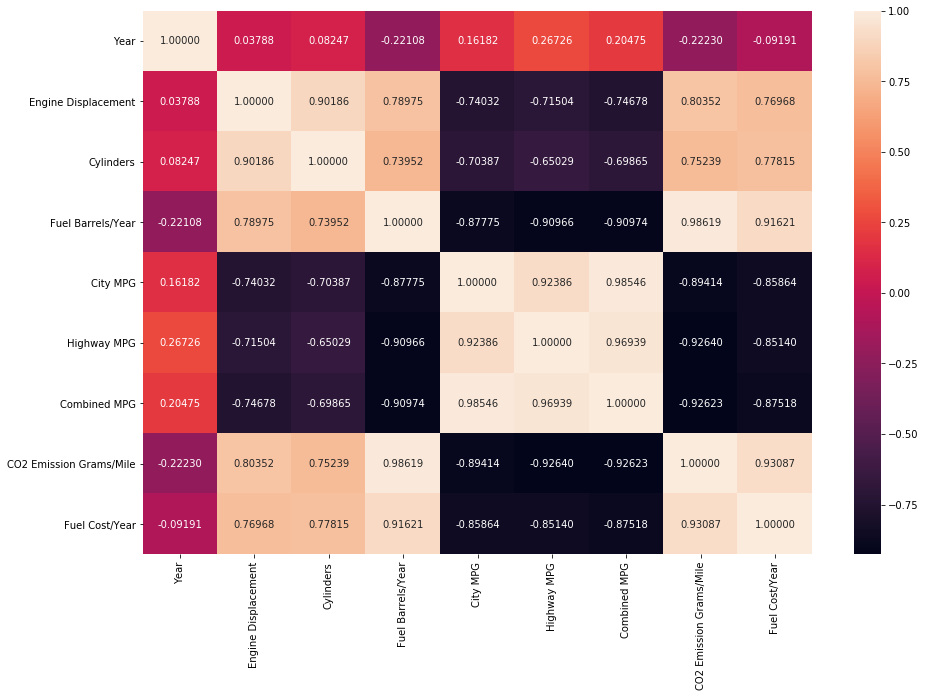

In [8]:
plt.figure(figsize=(15,10))

sns.heatmap(vehicles.corr(), annot=True, fmt='.5f');

The diagonal of a correlation matrix is always 1 since each variable has a perfect correlation with itself. <br>

We can see some interesting relationships. For example, engine displacement has over 90% correlation with number of cylinders. <br>
Fuel cost per year has a strong negative correlation with combined MPG. <br>
All groups of MPG have a strong correlation to each other.

### sns.pairplot()

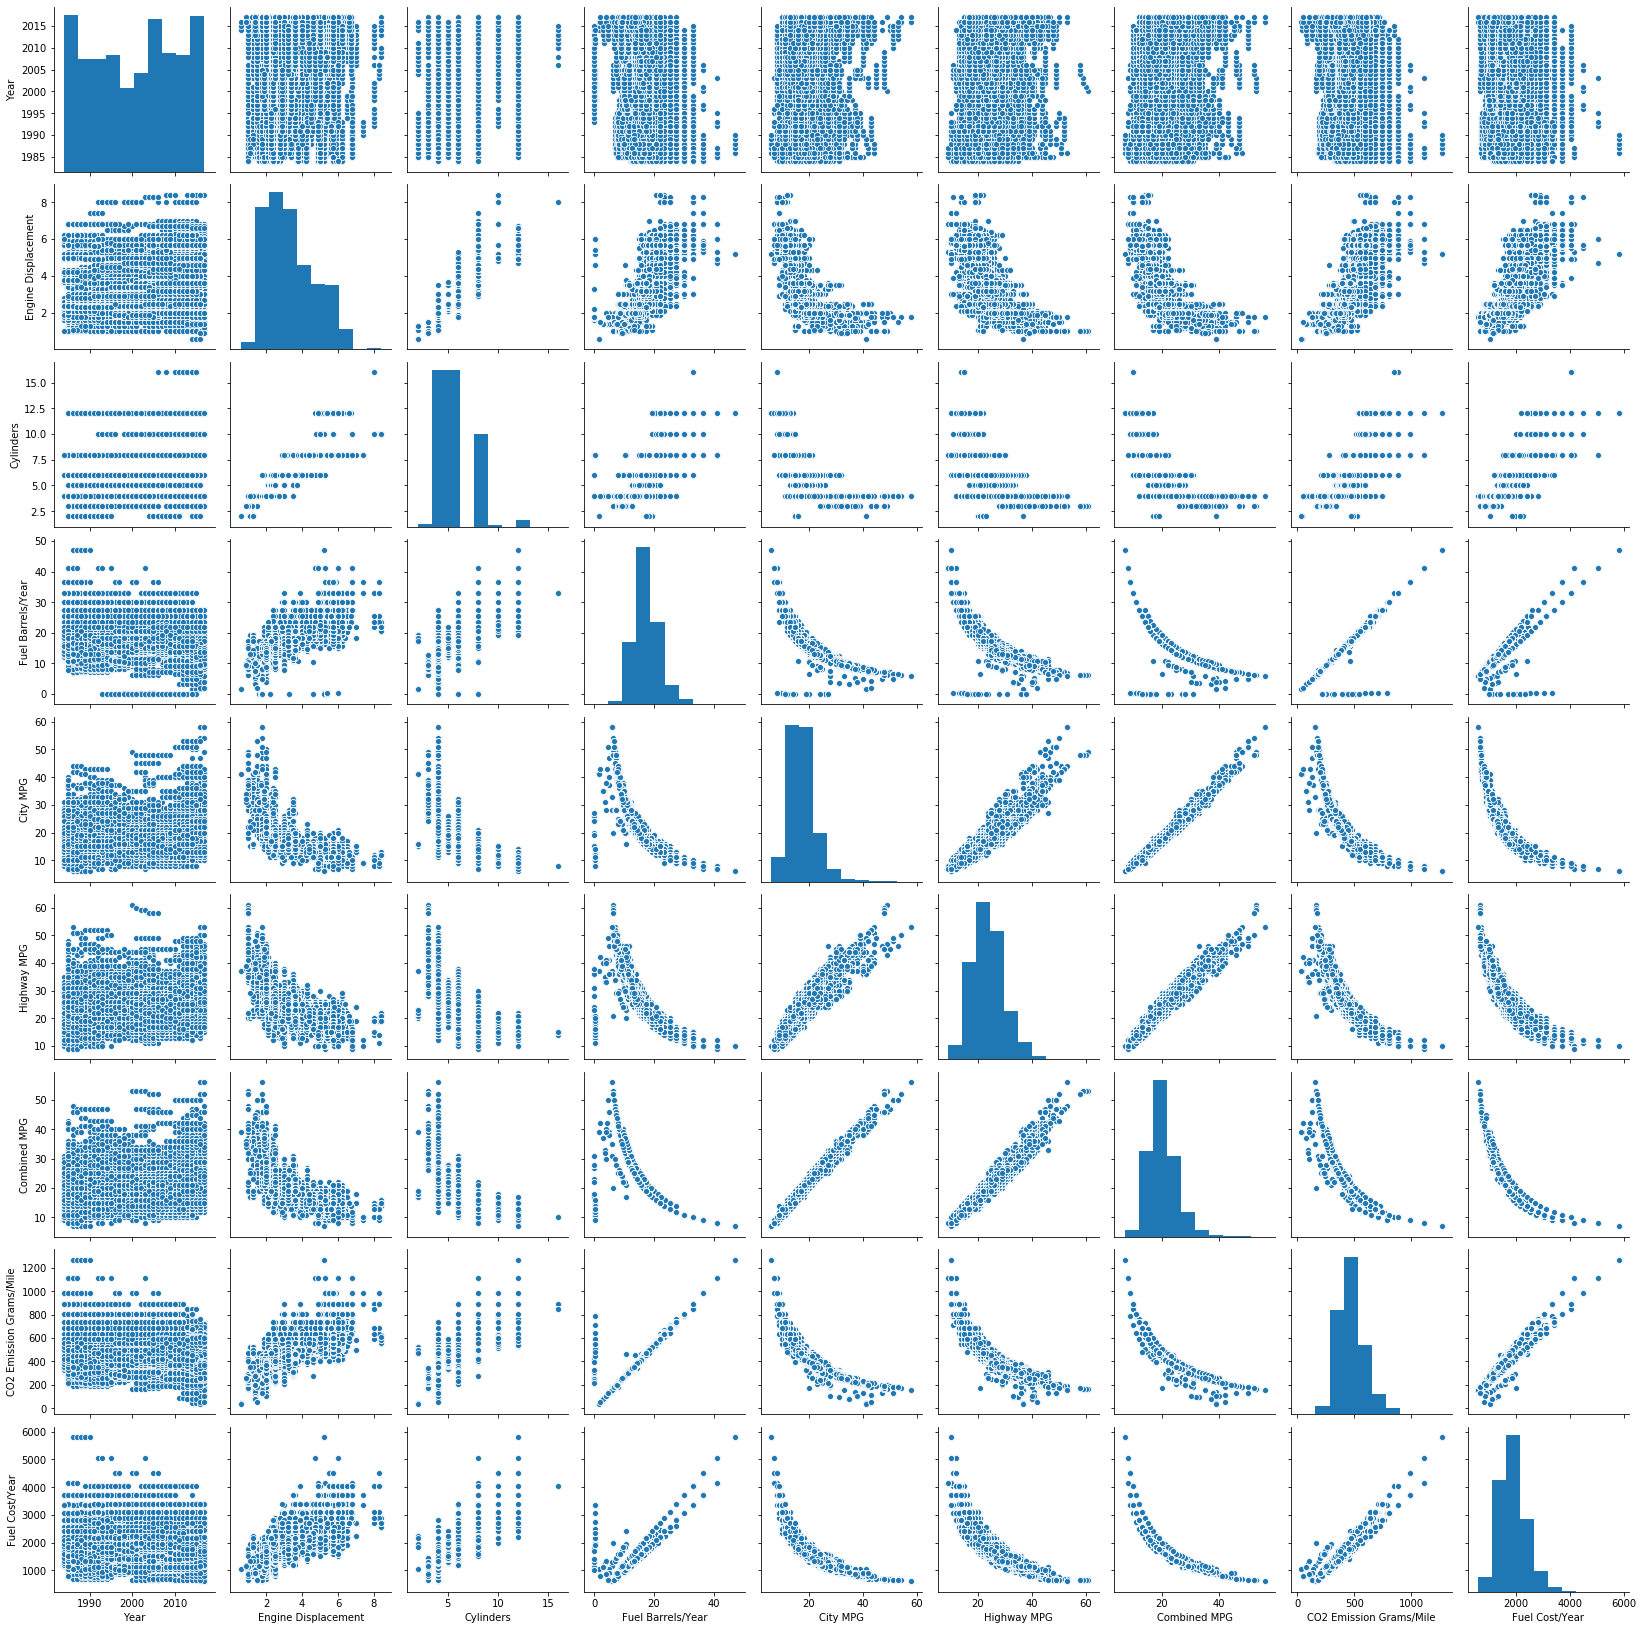

In [9]:
# Plot pairwise relationships in a dataset

# without regression - kind='scatter' as default 
sns.pairplot(vehicles);

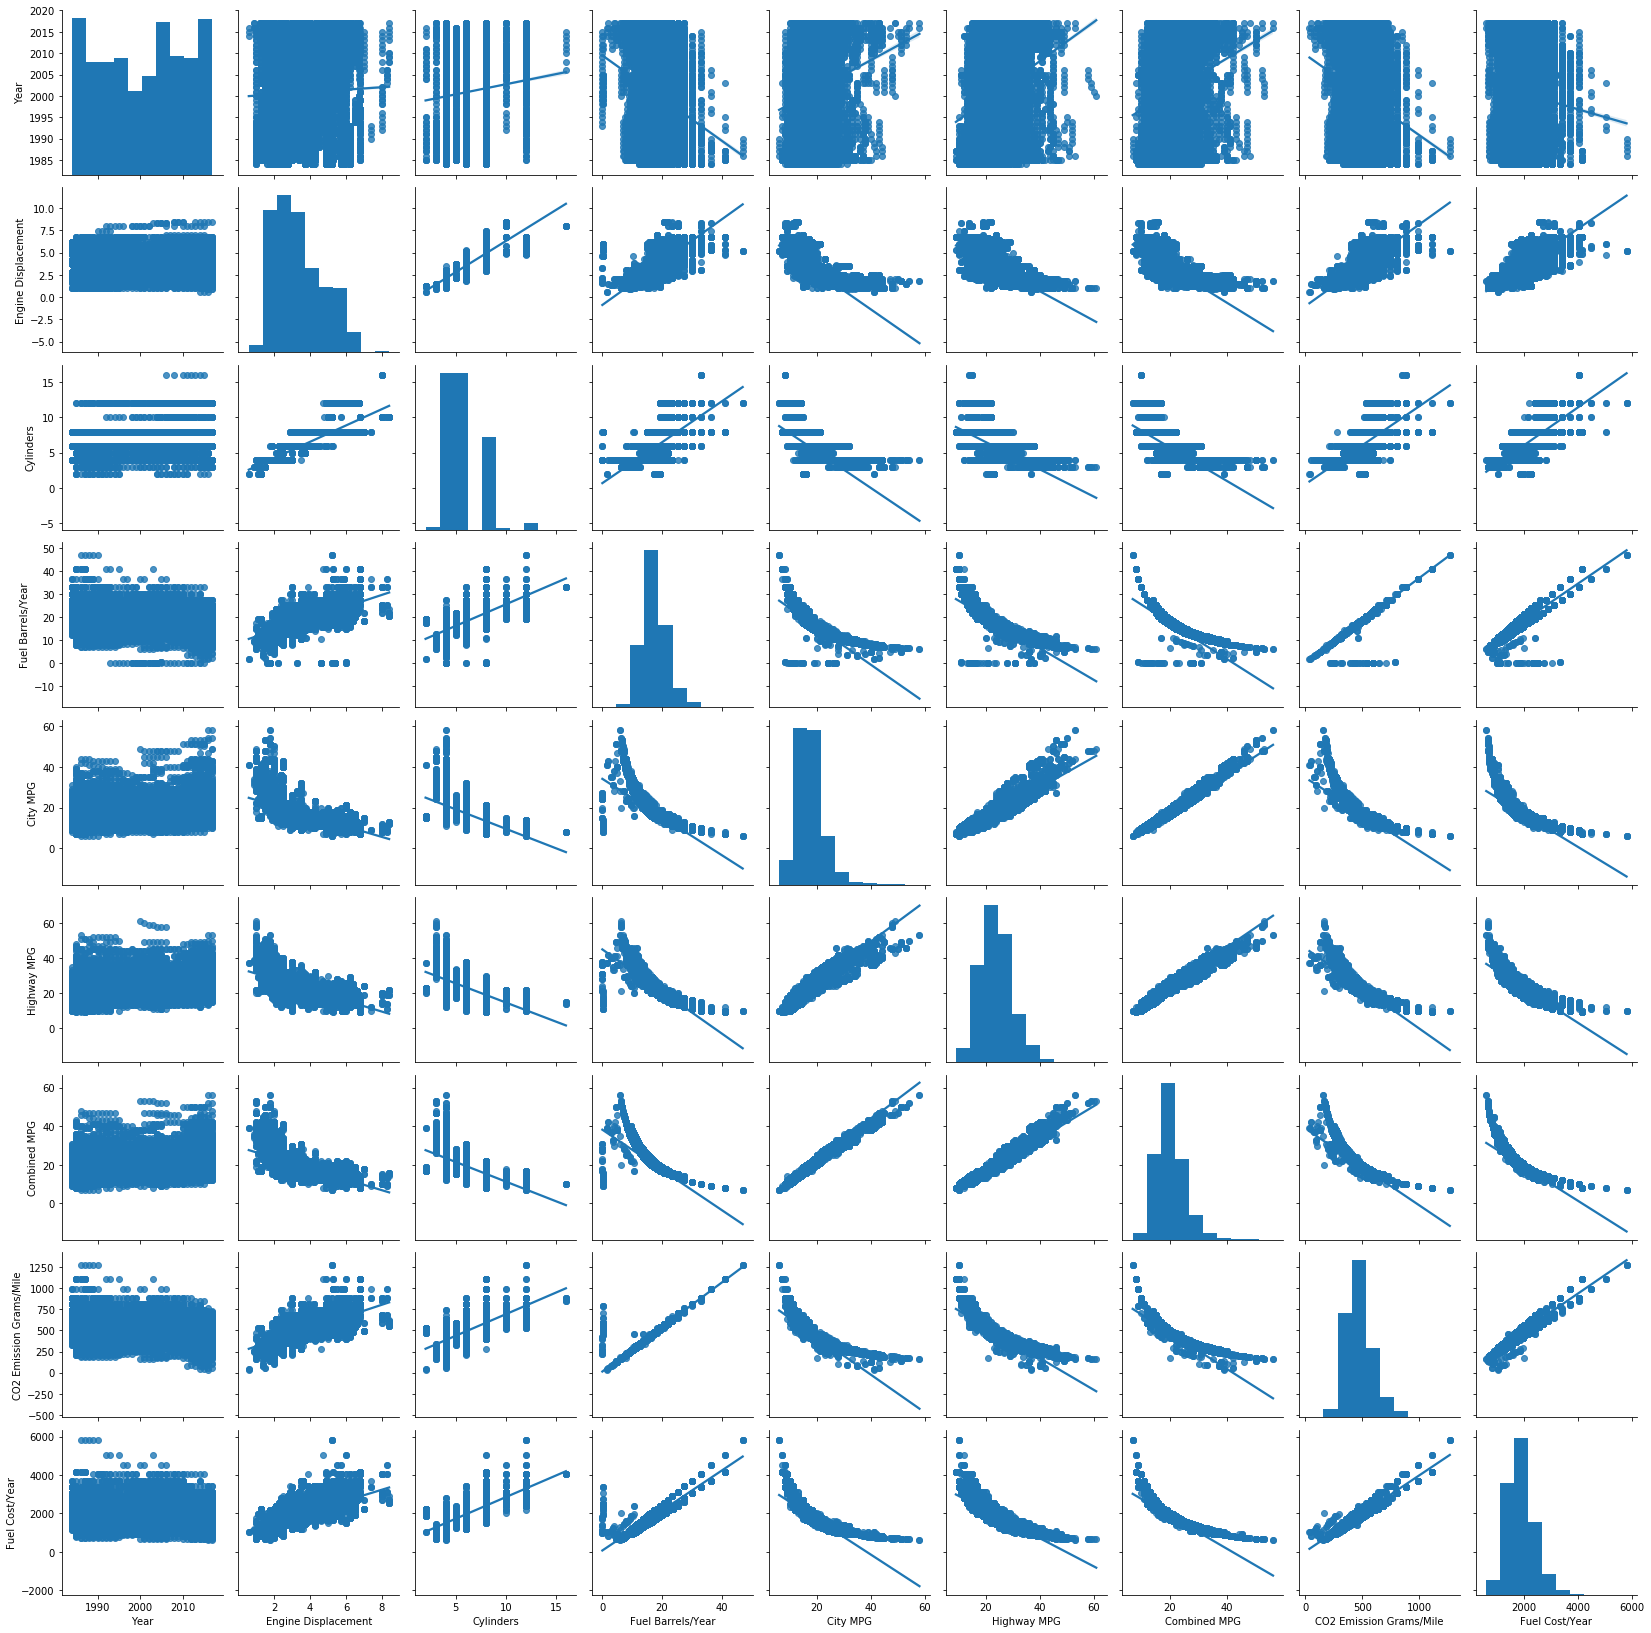

In [10]:
# with regression

sns.pairplot(vehicles, kind='reg');

## Other Types of Correlation

The pandas .corr function allows for three(03) types of correlation.

### Pearson Correlation

The first one we explored is called `Pearson` correlation. This type measures **linear correlation**. <br>

However, we can examine the two other types of correlation as well.

### Spearman Correlation

`Spearman` correlation is a **non-parametric measure of correlation**. <br>
Spearman correlation measures relationships between variables that are not necessarily linear.<br>
We are only looking at whether the data is moving in the **same or the opposite direction**.

We can measure the Spearman correlation by ranking the data in each column from largest to smallest and then <br>
compute the Pearson correlation of those ranks. <br>
The ranks of the data are linear. <br>Therefore, with non-linear data it makes sense to perform this transformation.

Here is an example of Spearman correlation in our vehicles dataset:

In [11]:
vehicles.corr(method='spearman')

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.051370,0.068727,-0.214857,0.157137,0.266934,0.205080,-0.215108,-0.091437
Engine Displacement,0.051370,1.000000,0.927979,0.827152,-0.848167,-0.754080,-0.824065,0.831333,0.794755
Cylinders,0.068727,0.927979,1.000000,0.784595,-0.818672,-0.698356,-0.783362,0.788777,0.790481
Fuel Barrels/Year,-0.214857,0.827152,0.784595,1.000000,-0.974144,-0.963335,-0.990364,0.995539,0.919069
City MPG,0.157137,-0.848167,-0.818672,-0.974144,1.000000,0.930120,0.985062,-0.979787,-0.928713
Highway MPG,0.266934,-0.754080,-0.698356,-0.963335,0.930120,1.000000,0.970769,-0.968693,-0.876067
Combined MPG,0.205080,-0.824065,-0.783362,-0.990364,0.985062,0.970769,1.000000,-0.995258,-0.926078
CO2 Emission Grams/Mile,-0.215108,0.831333,0.788777,0.995539,-0.979787,-0.968693,-0.995258,1.000000,0.922723
Fuel Cost/Year,-0.091437,0.794755,0.790481,0.919069,-0.928713,-0.876067,-0.926078,0.922723,1.000000


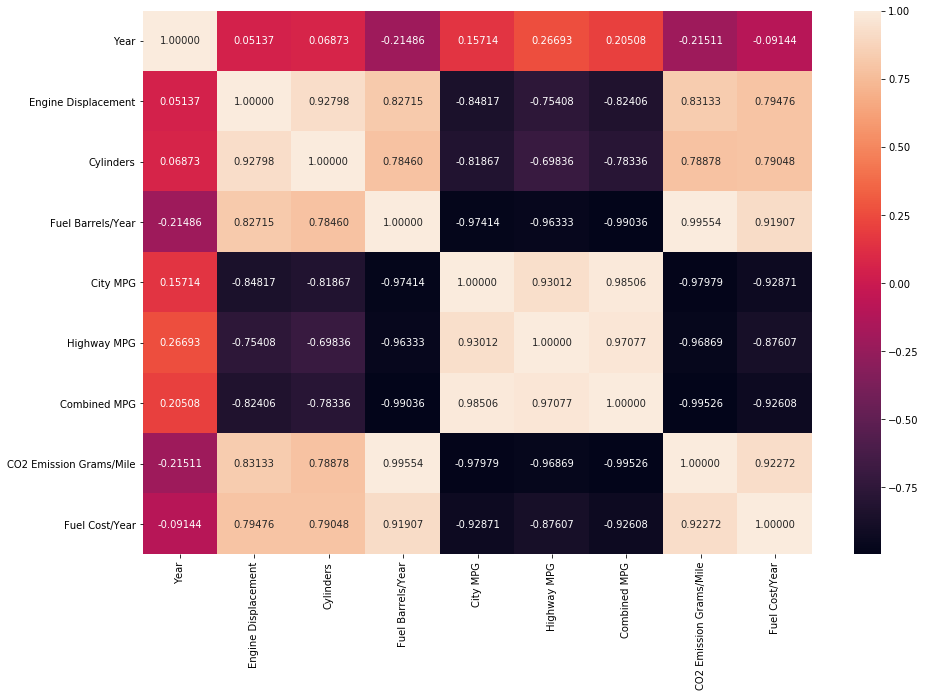

In [12]:
plt.figure(figsize=(15,10))

sns.heatmap(vehicles.corr(method='spearman'), annot=True, fmt='.5f');

### Kendall's Tau

`Kendall's Tau` is also a **non-parametric measure of correlation**. <br>
It is less commonly used than the Spearman correlation coefficient.

Here is an example of the Kendall's Tau coefficient between city and highway MPG:

In [13]:
vehicles['City MPG'].corr(vehicles['Highway MPG'], method='kendall')

0.8171408108342495

## Summary

In this lesson we learned how to compute the correlation between two columns in a DataFrame as well as a correlation matrix. <br>
We also learned two new types of non-parametric correlations.

---